In [9]:
from sklearn.calibration import calibration_curve
import pandas as pd

In [7]:
df=pd.read_csv('Pred_proba.csv', index_col=False)

In [8]:
y_test=df['Severity']
y_test_proba=df['NL']

In [27]:
NL_cal_y, NL_cal_x=calibration_curve(y_test, y_test_proba, n_bins=5)

In [28]:
[NL_cal_y, NL_cal_x]

[array([0.02857143, 0.        , 0.1       , 0.3       , 0.6       ]),
 array([0.05364468, 0.26693867, 0.48650593, 0.75273435, 0.89743168])]

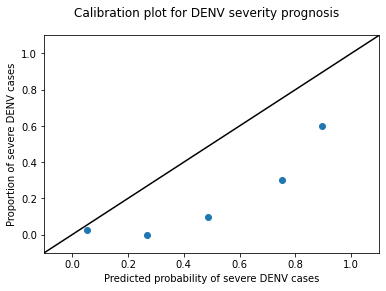

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

fig, ax=plt.subplots()
plt.plot(NL_cal_x, NL_cal_y,'o', label='ANN')

line=mlines.Line2D([0,1],[0,1], color='black')
transform=ax.transAxes
line.set_transform(transform)
ax.add_line(line)

fig.suptitle('Calibration plot for DENV severity prognosis')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('Predicted probability of severe DENV cases')
ax.set_ylabel('Proportion of severe DENV cases')
#plt.legend()
fig.savefig("calibration_plot.tif", dpi=300)
plt.show()